# The Relationship Between Housing Prices and Earthquakes in California

https://youtu.be/OOG0OHy6NYc

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

This project studied the relationship between housing prices and earthquake frequencies and magnitudes. We combined housing prices dataset and earthquake dataset by the same latitude and longitude areas and the years. After the process of data cleaning, data analysis and data visualization, we found that __the house in an area that has more earthquakes has a higher average price__. The detailed explanation is shown below. 

# Names

- Yuxin Guo
- Sha Lei
- Jingxian Wang
- Jiayi Zhang

<a id='research_question'></a>
# Research Question

How does magnitude and frequency of earthquakes affect housing prices in California?

<a id='background'></a>

## Background & Prior Work

Before coming to San Diego, our group members had not really experienced any earthquakes. After experiencing several unexpected shaking due to earthquakes, we want to explore how earthquakes affect California destructively from the perspective of socioeconomics and people's behavior mechanisms. 


Nowadays, Seismologists use unequivocal precursory signals to predict an earthquake. They will note changes in the environment before earthquakes, like an increase in radon gas concentrations, changes in electromagnetic activity, foreshocks, measurable ground deformations, geochemical changes in groundwater, and even unusual animal behavior. However, according to the research of scientists, even though we develop many technologies and measures to detect the abnormalities before earthquakes, we still cannot precisely predict earthquakes; thus, the damages brought by earthquakes are unavoidable for both the city's economic development and inhabitants’ living experience. [^1]


Before getting into deep research, based on our life experience, we hold a view that the housing market would be negatively affected by earthquakes since the earthquake, such a threatening and destructive natural disaster, is hard to predict and unavoidable. Additionally, earthquakes provide a spatial differentiation of the impact on the quality of life according to the earthquake intensity.[^2] Hence, we expect that people might decide to move to areas affected by less or no earthquakes, leading to lower local house prices. 


However, as the process of research continues, different theories that explain the relationship between earthquakes and housing prices caught our attention.  An exceptional case study mentioned in "Earthquakes and House Prices" indicates that in areas that experience less severe earthquakes, the house price even increases since the real estate agents increase the insurance fee in the name of protecting the community against the upcoming earthquakes.[^3] It is almost opposite to our expectation of the relationship between the earthquake and the housing price. And we consider it worthwhile to explore how people would take action against the damage brought by earthquakes and affect the real estate market. Therefore, it leads to our research question - how the earthquake shaking intensity, magnitude, frequency, and duration affect housing prices in California. 

References (include links):
- 1) Cheung, Ron, et al. “Earthquakes and House Prices: Evidence from Oklahoma.” Working Paper (Federal Reserve Bank of Cleveland), 2016, https://doi.org/10.26509/frbc-wp-201631. 
- 2) Boelhouwer, Peter, and Harry van der Heijden. “The Effect of Earthquakes on the Housing Market and the Quality of Life in the Province of Groningen, The Netherlands.” Journal of Housing and the Built Environment : HBE, Springer Netherlands, 2018, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5943382/. 
- 3) Bressan, David. “Why Can't We Predict Earthquakes?” Forbes, Forbes Magazine, 24 Nov. 2017,  https://www.forbes.com/sites/davidbressan/2017/11/24/why-cant-we-predict-earthquakes/?sh=6b4afc126332.  



# Hypothesis


We predict that there is a relationship between housing price and earthquake magnitude and frequency in different regions of California. The region with more earthquakes will have a higher housing price and the region with fewer earthquakes will have a lower housing price. 

# Dataset(s)

Dataset name: California Housing Prices
- Link to the dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices
- Number of observations: 20640
- Variables: longitude, latitude, housingmedianage, total_rooms, total_bedrooms, population, households, median_income, medianhousevalue, cean_proximity
- Dataset description: The data in this dataset was collected by 1990 California census. This dataset is not cleaned, further data cleaning steps requir. This dataset contains data relative to location of the house, housing agency, housing area, households income and ocean proximity. The name of columns are self explanitory. 

Dataset name: Earthquake_data
- Link to the dataset: https://earthquake.usgs.gov/earthquakes/search/
- Number of observations: 11638
- Variables: time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource
- Dataset description: The data in this dataset was collected by the United States Geological Survey. We used the USGS website to filter the earthquake magnitude, date and time and geographic region to collect data we want. Important details about the earthquake such as location, magnitude, intensiy and depth are included. The name of columns are self explanitory. 

We plan to combine those two datasets by selecting the years and the range of the longitude and altitude.

# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

import patsy 
import statsmodels.api as sm 
import statsmodels.formula.api as smf

import warnings
warnings.simplefilter('ignore')

In [2]:
earthquakes_data = pd.read_csv('data/earthquake_data.csv')
earthquakes_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1989-12-31T21:14:44.080Z,36.937,-121.6825,11.571,2.89,md,94.0,56.0,0.01712,0.070,...,2016-12-10T03:06:41.470Z,"4 km ESE of Interlaken, California",earthquake,0.14,0.260,0.11,96.0,reviewed,nc,nc
1,1989-12-31T14:38:18.260Z,33.772,-115.9900,4.510,2.60,mc,0.0,141.3,NaN,0.072,...,2016-02-03T23:49:17.760Z,"20km ENE of Coachella, CA",earthquake,NaN,0.012,NaN,12.0,reviewed,ci,ci
2,1989-12-31T13:32:43.250Z,33.769,-115.9940,4.832,2.50,mc,0.0,89.3,NaN,0.053,...,2016-02-03T21:53:32.250Z,"19km ENE of Coachella, CA",earthquake,NaN,0.007,NaN,17.0,reviewed,ci,ci
3,1989-12-31T12:54:12.920Z,33.501,-116.4680,5.907,2.65,mc,0.0,176.3,NaN,0.217,...,2016-02-04T05:03:58.700Z,"20km ESE of Anza, CA",earthquake,NaN,0.175,NaN,62.0,reviewed,ci,ci
4,1989-12-31T12:53:51.490Z,33.484,-116.4440,7.275,3.15,mc,0.0,27.1,NaN,0.130,...,2016-02-03T19:54:57.290Z,"23km ESE of Anza, CA",earthquake,NaN,0.025,NaN,84.0,reviewed,ci,ci


In [3]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Cleaning

##### First, select the CA region from the `earthquakes_data` dataframe.

For this research, we only want to explore the relationship between housing prices and earthquakes in California. Thus, we want to filter the earthquake data which happened in California.

In [4]:
CA_earthquake = earthquakes_data[earthquakes_data['place'].str.contains('CA')|\
                                 earthquakes_data['place'].str.contains('California')]

##### Second, remove useless variables in `CA_earthquake` DataFrame and set `id` as primary keys.

In this step, our goal is to remove all the useless columns. The variables we chose to remove are redundancy and unrelated with our topic. Removing them makes the further analysis more clearer and easier. 

In [5]:
CA_earthquake = CA_earthquake.drop(columns = ['depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'updated', 'place', \
                                              'horizontalError', 'depthError', 'magError', 'magNst', 'status',\
                                              'locationSource', 'magSource']).set_index('id')
CA_earthquake.head()

,time,latitude,longitude,mag,type
id,,,,,
nc149897,1989-12-31T21:14:44.080Z,36.937,-121.6825,2.89,earthquake
ci1048992,1989-12-31T14:38:18.260Z,33.772,-115.9900,2.60,earthquake
ci1048985,1989-12-31T13:32:43.250Z,33.769,-115.9940,2.50,earthquake
ci140492,1989-12-31T12:54:12.920Z,33.501,-116.4680,2.65,earthquake
ci1048984,1989-12-31T12:53:51.490Z,33.484,-116.4440,3.15,earthquake


##### Third, update data type in `CA_earthquake` DataFrame

In this step, we updated the `time` column in `CA_earthquake` DataFrame to `pd.Timestamp()` type for the process of later combination of datasets and analysis. We only select the year part from `time` data.

In [6]:
# demonstrate the current data type in CA_earthquake dataframe
CA_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10431 entries, nc149897 to ci57759
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       10431 non-null  object 
 1   latitude   10431 non-null  float64
 2   longitude  10431 non-null  float64
 3   mag        10431 non-null  float64
 4   type       10431 non-null  object 
dtypes: float64(3), object(2)
memory usage: 489.0+ KB


In [7]:
CA_earthquake['time'] = pd.to_datetime(CA_earthquake['time']).dt.year
CA_earthquake.head()

,time,latitude,longitude,mag,type
id,,,,,
nc149897,1989,36.937,-121.6825,2.89,earthquake
ci1048992,1989,33.772,-115.9900,2.60,earthquake
ci1048985,1989,33.769,-115.9940,2.50,earthquake
ci140492,1989,33.501,-116.4680,2.65,earthquake
ci1048984,1989,33.484,-116.4440,3.15,earthquake


##### Finally, combine the `CA_earthquake` DataFrame and `housing` DataFrame and save the merged DataFrame into a new DataFrame called `housing_earthquake`.

In this project, we want to filter the range of the area around each housing location and calculate the total number of earthquakes that have happened in that area.

During the exploration process, we notice there are two types of earthquake, natural earthquakes and earthquakes caused by quarry blast. Thus we calculate the total number of each natural earthquakes and the earthquakes caused by quarry blast in each area. We put the total number of natural earthquakes in each area in a column called `earthquake`. And the total number of earthquakes caused by quarry blast in each area in a column called `quarry blast`.

After calculation and update the DataFrame, we saved the DataFrame into a new DataFrame called `housing_earthquake`.

In [8]:
result_mag = {'earthquake':[], 'quarry blast':[]}

for row in np.arange(housing.shape[0]):
    longitude_right = housing.iloc[row]['longitude'] + 0.1
    longitude_left = housing.iloc[row]['longitude'] - 0.1
    latitude_right = housing.iloc[row]['latitude'] + 0.1
    latitude_left = housing.iloc[row]['latitude'] - 0.1
    
    type_result = CA_earthquake[(CA_earthquake['longitude'] >= longitude_left) & (CA_earthquake['longitude'] \
    <= longitude_right) & (CA_earthquake['latitude'] >= latitude_left) & (CA_earthquake['latitude'] \
    <= latitude_right)]['type'].value_counts()
    
    for key in result_mag.keys():
        if key in type_result.keys():
            result_mag[key].append(type_result[key]) 
        else:
            result_mag[key].append(0)

In [9]:
housing_earthquake = housing.copy()
housing_earthquake['earthquake'] = result_mag['earthquake']
housing_earthquake['quarry_blast'] = result_mag['quarry blast']
housing_earthquake['total_earthquake'] = housing_earthquake['earthquake'] + housing_earthquake['quarry_blast']

In [10]:
housing_earthquake.drop(columns = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', \
                                   'households', 'population'], inplace = True)

In [11]:
def standardize_series(ser):
    return (ser - ser.mean())/ser.std()

In [12]:
housing_earthquake['housing_median_age'] = standardize_series(housing_earthquake['housing_median_age'])
housing_earthquake['median_income'] = standardize_series(housing_earthquake['median_income'])
housing_earthquake['earthquake'] = standardize_series(housing_earthquake['earthquake'])
housing_earthquake['quarry_blast'] = standardize_series(housing_earthquake['quarry_blast'])
housing_earthquake['median_house_value'] = standardize_series(housing_earthquake['median_house_value'])
housing_earthquake['total_earthquake'] = standardize_series(housing_earthquake['total_earthquake'])

In [13]:
housing_earthquake.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,earthquake,quarry_blast,total_earthquake
0,0.982119,2.344709,2.129580,NEAR BAY,0.066359,-0.17882,0.039857
1,-0.607004,2.332181,1.314124,NEAR BAY,0.113755,-0.17882,0.086760
2,1.856137,1.782656,1.258663,NEAR BAY,0.255943,-0.17882,0.227471
3,1.856137,0.932945,1.165072,NEAR BAY,0.113755,-0.17882,0.086760
4,1.856137,-0.012881,1.172871,NEAR BAY,0.113755,-0.17882,0.086760


# Data Analysis & Results

### Generate DataFrame Demonstration

Glance the data in `housing_earthquake` 

In [14]:
housing_earthquake.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,earthquake,quarry_blast,total_earthquake
0,0.982119,2.344709,2.129580,NEAR BAY,0.066359,-0.17882,0.039857
1,-0.607004,2.332181,1.314124,NEAR BAY,0.113755,-0.17882,0.086760
2,1.856137,1.782656,1.258663,NEAR BAY,0.255943,-0.17882,0.227471
3,1.856137,0.932945,1.165072,NEAR BAY,0.113755,-0.17882,0.086760
4,1.856137,-0.012881,1.172871,NEAR BAY,0.113755,-0.17882,0.086760


Descriptive statistics of `housing_earthquak`

In [15]:
housing_earthquake.describe()

,housing_median_age,median_income,median_house_value,earthquake,quarry_blast,total_earthquake
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.817399e-15,-2.526564e-14,3.767873e-16,-1.349254e-15,2.260522e-14,-5.663385e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.196127e+00,-1.774256e+00,-1.662601e+00,-5.497880e-01,-1.788196e-01,-5.698888e-01
25%,-8.453727e-01,-6.881019e-01,-7.561450e-01,-5.023921e-01,-1.788196e-01,-5.229853e-01
50%,2.864502e-02,-1.767908e-01,-2.353280e-01,-3.128085e-01,-1.788196e-01,-3.353713e-01
75%,6.642943e-01,4.592952e-01,5.014851e-01,1.896296e-02,-1.788196e-01,-7.046886e-03
max,1.856137e+00,5.858144e+00,2.540349e+00,2.044660e+01,8.170256e+01,2.020836e+01


Demonstrate columns, data type, non-null values and memory usage of `housing_earthquake` DataFrame.

In [16]:
housing_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   median_house_value  20640 non-null  float64
 3   ocean_proximity     20640 non-null  object 
 4   earthquake          20640 non-null  float64
 5   quarry_blast        20640 non-null  float64
 6   total_earthquake    20640 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


Demonstrate the dimensionality of the `housing_earthquake` DataFrame.

In [17]:
housing_earthquake.shape

(20640, 7)

### General Data Distribution

In this analysis, we are going to demonstrate the relationship between the number of earthquakes and the housing prices. 

First, we are going to show the distribution of the magnitude of the earthquakes. Since we are going to demonstrate distribution for one variable for each graph, we choose to use histogram. 

The histogram below displays the frequency of the earthquakes magnitude of different levels. The numbers on the x-axis represent the magnitude of the earthquakes. The numbers on the y-axis represent frequency. We can see from the histogram, most of the magnitude of the earthquakes is between magnitude 2~3. Magnitude 2 has the highest frequency. Then as the magnitude increases, the frequency decreases. Ater magnitude 6, the frequency of earthquakes reaches zero.

[Text(0.5, 0, 'Earthquake Magnitude'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of All Kinds of Earthquake Magnitude')]

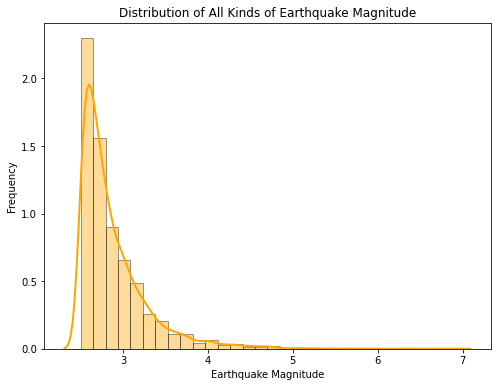

In [18]:
# figure size in inches
plt.rcParams['figure.figsize'] = 8,6

ax = sns.distplot(CA_earthquake['mag'], bins = 30, hist=True, kde=True, color='orange', \
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2})
ax.set(xlabel='Earthquake Magnitude', \
       ylabel='Frequency', title="Distribution of All Kinds of Earthquake Magnitude")

Text(0.5, 0.98, 'Distribution of Different Kind of Earthquakes')

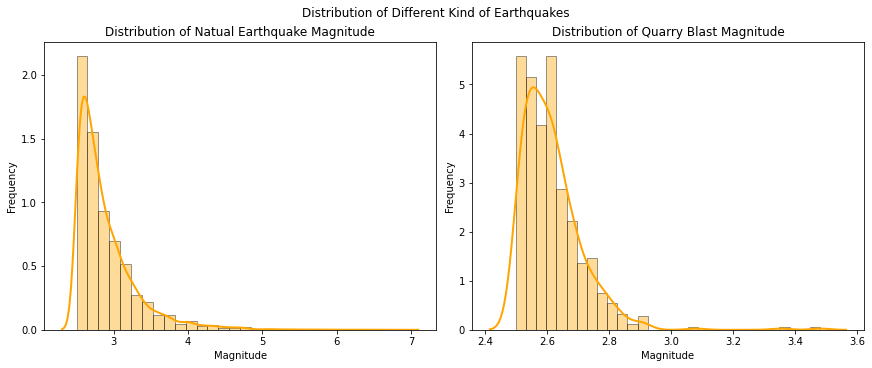

In [19]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = [12, 5])

# plot axes[0]
sns.distplot(CA_earthquake[CA_earthquake['type'] == 'earthquake']['mag'], bins = 30, hist=True, kde=True, \
                  color='orange', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2}, ax = axes[0])
axes[0].set(xlabel='Magnitude', ylabel='Frequency', title="Distribution of Natual Earthquake Magnitude")

# plot axes[1]
axes[1] = sns.distplot(CA_earthquake[CA_earthquake['type'] == 'quarry blast']['mag'], bins = 30, hist=True, kde=True, \
                  color='orange', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2})
axes[1].set(xlabel='Magnitude', ylabel='Frequency', title="Distribution of Quarry Blast Magnitude")

# add the title to fig
fig.suptitle('Distribution of Different Kind of Earthquakes')

During the process of analysis, we found that there are two different causes of earthquakes. One is natural earthquakes and the other is earthquakes caused by quarry blast.

The histogram below demonstrates the distribution of natural earthquakes. We can see that the distribution is kind of the same as the previous histogram distribution, which indicates that natural earthquakes occupy the most of the earthquakes. 

The histogram below demonstrates the frequency of earthquakes caused by quarry blast. The numbers on the x-axis represent the magnitude of the earthquake and the numbers on the y-axis represent the frequency of earthquakes happening. The distribution of the earthquake  magnitude is right tailed, which means that earthquake magnitude in range 2.5 to 2.7 has the highest frequency. As the earthquake magnitude increases, the frequency decreases and finally reaches zero. 

Then, we are going to show the distribution of the housing price.

The histogram below is the distribution of housing prices in California. The x-axis represents housing prices and the y-axis represents the frequency of earthquakes. The histogram shows that the housing prices is a bimodal distribution, which means there are two clearly separate groups visible in this histogram. One group is the housing prices in 90000 to 200000. Another group is the housing prices in 490000 to 500000. These two groups have the highest frequency. In the other words, most housing prices in California are within 90000 to 200000 or 490000 to 500000. The housing price has significant differences.The bimodal distribution may be related to earthquakes. But we need further analysis to explore it. 

[Text(0.5, 0, 'Housing Price'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Housing Price')]

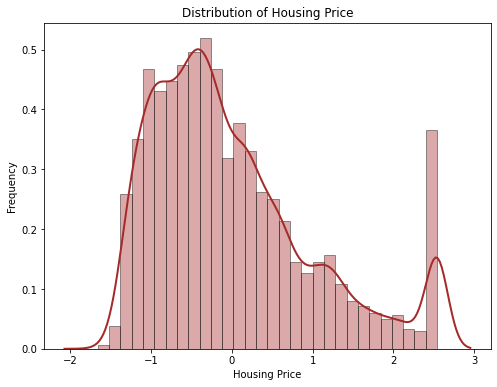

In [20]:
ax = sns.distplot(housing_earthquake['median_house_value'], bins = 30, hist=True, kde=True, \
                  color='brown', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2})
ax.set(xlabel='Housing Price', \
       ylabel='Frequency', title="Distribution of Housing Price")

### Remove Outliers

During the distribution demonstration, we notice that there are outliers in the count of natural earthquakes and the count of earthquakes caused by quarry blast in different regions. In order to avoid the effect of outliers in our future analysis, we are going to remove the outliers before demonstrating two types of earthquake count distribution. 

In [21]:
housing_earthquake['quarry_blast'].value_counts()

-0.178820     19135
 0.146107       192
 0.795959       157
 5.019998       155
 2.095663       149
 1.445811       134
 1.120885       125
 2.420589       120
 0.471033       109
 2.745515       104
 3.070442        48
 1.770737        45
 4.695072        44
 3.395368        42
 5.669850        18
 5.344924        14
 7.619407        10
 5.994777         9
 7.944333         7
 6.319703         6
 3.720294         4
 12.493299        3
 18.666895        2
 4.370146         2
 7.294481         1
 11.518520        1
 21.591230        1
 13.143151        1
 81.702560        1
 6.644629         1
Name: quarry_blast, dtype: int64

In [22]:
# Remove outliers
housing_earthquake = housing_earthquake[housing_earthquake['quarry_blast'] < 15]
housing_earthquake = housing_earthquake[housing_earthquake['earthquake'] < 10]

Let's take a look at earthquake count distribution in different regions after remove outliers.

The below histogram shows a right tailed distribution. It means that most regions have 0 to 5 earthquakes caused by quarry blast. 

Text(0.5, 0.98, 'Distribution of Different Kind of Earthquakes')

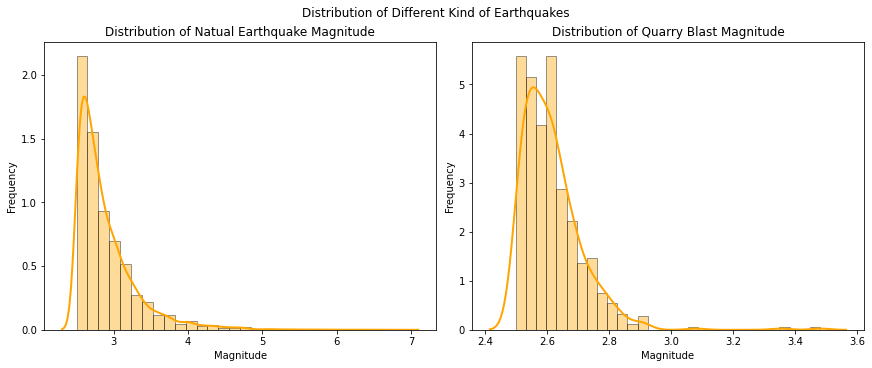

In [23]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = [12, 5])

# plot axes[0]
sns.distplot(CA_earthquake[CA_earthquake['type'] == 'earthquake']['mag'], bins = 30, hist=True, kde=True, \
                  color='orange', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2}, ax = axes[0])
axes[0].set(xlabel='Magnitude', ylabel='Frequency', title="Distribution of Natual Earthquake Magnitude")

# plot axes[1]
axes[1] = sns.distplot(CA_earthquake[CA_earthquake['type'] == 'quarry blast']['mag'], bins = 30, hist=True, kde=True, \
                  color='orange', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2})
axes[1].set(xlabel='Magnitude', ylabel='Frequency', title="Distribution of Quarry Blast Magnitude")

# add the title to fig
fig.suptitle('Distribution of Different Kind of Earthquakes')

Text(0.5, 0.98, 'Distribution of Different Kind of Earthquakes')

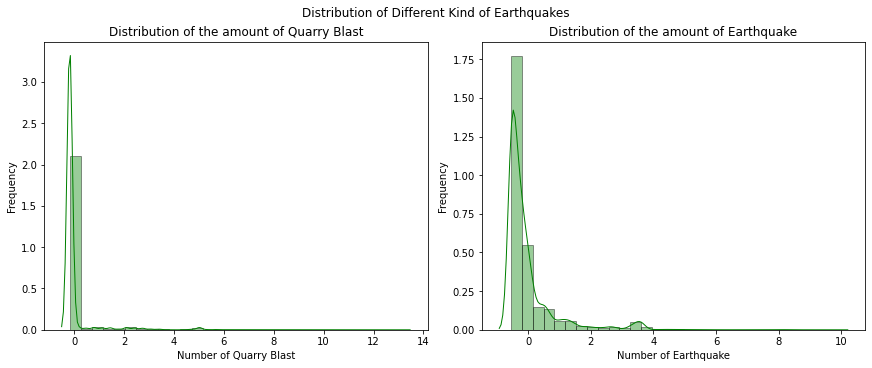

In [24]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = [12, 5])

# plot axes[0]
sns.distplot(housing_earthquake['quarry_blast'], bins = 30, hist=True, kde=True, \
                  color='green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':1}, ax = axes[0])
axes[0].set(xlabel='Number of Quarry Blast', ylabel='Frequency', title = "Distribution of the amount of Quarry Blast")

# plot axes[1]
sns.distplot(housing_earthquake['earthquake'], bins = 30, hist=True, kde=True, \
                  color='green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':1}, ax = axes[1])
axes[1].set(xlabel='Number of Earthquake', ylabel='Frequency', title = "Distribution of the amount of Earthquake")

# add the title to fig
fig.suptitle('Distribution of Different Kind of Earthquakes')

The below histogram shows a right tailed distribution. It means that most regions have 0 to 25 natural earthquakes. 

[Text(0.5, 0, 'Number of Earthquake'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of the Amount of All Kinds of Earthquake')]

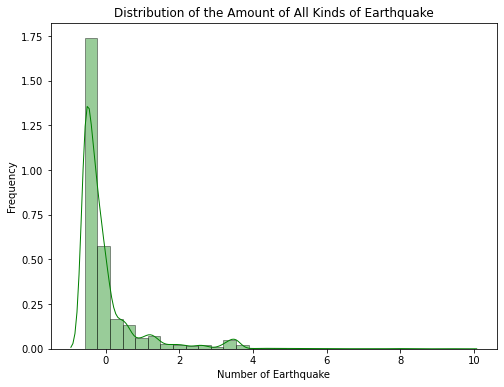

In [25]:
ax = sns.distplot(housing_earthquake['total_earthquake'], bins = 30, hist=True, kde=True, \
                  color='green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':1})
ax.set(xlabel='Number of Earthquake', \
       ylabel='Frequency', title = "Distribution of the Amount of All Kinds of Earthquake")

Text(0.5, 0.98, 'Distribution of Different Median Age and Income')

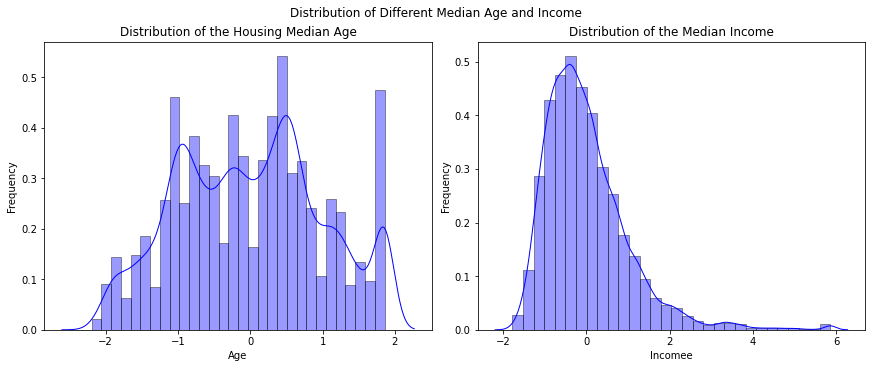

In [26]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = [12, 5])
# housing_median_age + median_income
# plot axes[0]
sns.distplot(housing_earthquake['housing_median_age'], bins = 30, hist=True, kde=True, \
                  color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':1}, ax = axes[0])
axes[0].set(xlabel='Age', ylabel='Frequency', title = "Distribution of the Housing Median Age")

# plot axes[1]
sns.distplot(housing_earthquake['median_income'], bins = 30, hist=True, kde=True, \
                  color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':1}, ax = axes[1])
axes[1].set(xlabel='Incomee', ylabel='Frequency', title = "Distribution of the Median Income")

# add the title to fig
fig.suptitle('Distribution of Different Median Age and Income')

### Analysis

<AxesSubplot:xlabel='total_earthquake', ylabel='median_house_value'>

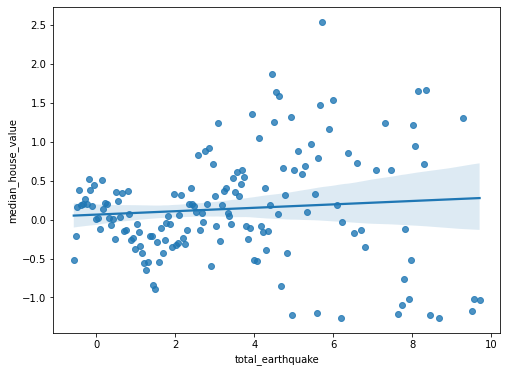

In [27]:
all_earthquake_dist = housing_earthquake.groupby(['total_earthquake'])[['median_house_value']].mean().reset_index()
sns.regplot(data = all_earthquake_dist, x = 'total_earthquake', y = 'median_house_value')

In [28]:
outcome, predictors = patsy.dmatrices('median_house_value ~ total_earthquake', housing_earthquake)
model_all_earthquake = sm.OLS(outcome, predictors)
print(model_all_earthquake.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           9.13e-18
Time:                        09:54:21   Log-Likelihood:                -29226.
No. Observations:               20624   AIC:                         5.846e+04
Df Residuals:                   20622   BIC:                         5.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0014      0.007  

<AxesSubplot:xlabel='earthquake', ylabel='median_house_value'>

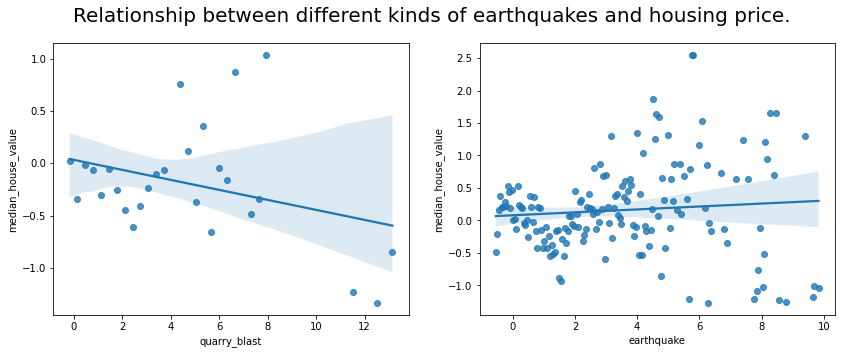

In [29]:
plt.rcParams['figure.figsize'] = [14, 5]

# Extract the columns that we want to analyze
f, axes = plt.subplots(1,2)
f.suptitle('Relationship between different kinds of earthquakes and housing price.', fontsize=20)

# Plotting
blast_dist = housing_earthquake.groupby('quarry_blast')[['median_house_value']].mean().reset_index()
sns.regplot(data = blast_dist, x = 'quarry_blast', y = 'median_house_value', ax=axes[0])

earthquake_dist = housing_earthquake.groupby(['earthquake'])[['median_house_value']].mean().reset_index()
sns.regplot(data = earthquake_dist, x = 'earthquake', y = 'median_house_value', ax=axes[1])

In [30]:
outcome, predictors = patsy.dmatrices('median_house_value ~ earthquake + quarry_blast', housing_earthquake)
model_diff_earthquake = sm.OLS(outcome, predictors)
print(model_diff_earthquake.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     86.95
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.50e-38
Time:                        09:54:22   Log-Likelihood:                -29176.
No. Observations:               20624   AIC:                         5.836e+04
Df Residuals:                   20621   BIC:                         5.838e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0009      0.007      0.132   

In [31]:
housing_earthquake

,housing_median_age,median_income,median_house_value,ocean_proximity,earthquake,quarry_blast,total_earthquake
0,0.982119,2.344709,2.129580,NEAR BAY,0.066359,-0.17882,0.039857
1,-0.607004,2.332181,1.314124,NEAR BAY,0.113755,-0.17882,0.086760
2,1.856137,1.782656,1.258663,NEAR BAY,0.255943,-0.17882,0.227471
3,1.856137,0.932945,1.165072,NEAR BAY,0.113755,-0.17882,0.086760
4,1.856137,-0.012881,1.172871,NEAR BAY,0.113755,-0.17882,0.086760
...,...,...,...,...,...,...,...
20635,-0.289180,-1.216099,-1.115777,INLAND,-0.549788,-0.17882,-0.569889
20636,-0.845373,-0.691576,-1.124443,INLAND,-0.502392,-0.17882,-0.522985
20637,-0.924829,-1.142566,-0.992722,INLAND,-0.502392,-0.17882,-0.522985
20638,-0.845373,-1.054557,-1.058583,INLAND,-0.502392,-0.17882,-0.522985


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

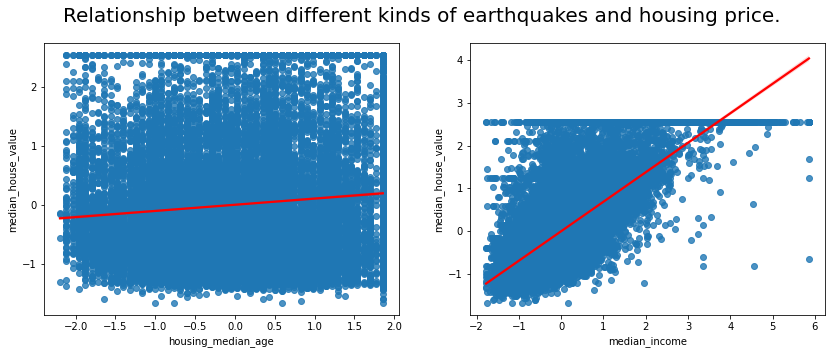

In [32]:
plt.rcParams['figure.figsize'] = [14, 5]

# Extract the columns that we want to analyze
f, axes = plt.subplots(1,2)
f.suptitle('Relationship between different kinds of earthquakes and housing price.', fontsize=20)

# Plotting
sns.regplot(data = housing_earthquake, x = 'housing_median_age', y = 'median_house_value', line_kws={"color": "red"} , ax=axes[0])
sns.regplot(data = housing_earthquake, x = 'median_income', y = 'median_house_value', line_kws={"color": "red"}, ax=axes[1])

In [33]:
outcome, predictors = patsy.dmatrices('median_house_value ~ housing_median_age', housing_earthquake)
model_median_age = sm.OLS(outcome, predictors)
print(model_median_age.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.10e-51
Time:                        09:54:24   Log-Likelihood:                -29149.
No. Observations:               20624   AIC:                         5.830e+04
Df Residuals:                   20622   BIC:                         5.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0007      0

In [34]:
outcome, predictors = patsy.dmatrices('median_house_value ~ median_income', housing_earthquake)
model_median_income = sm.OLS(outcome, predictors)
print(model_median_income.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.854e+04
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:54:24   Log-Likelihood:                -22649.
No. Observations:               20624   AIC:                         4.530e+04
Df Residuals:                   20622   BIC:                         4.532e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0005      0.005      0.104

In [35]:
outcome, predictors = patsy.dmatrices('median_house_value ~ housing_median_age + earthquake + quarry_blast', housing_earthquake)
model_median_age_earthquake = sm.OLS(outcome, predictors)
print(model_median_age_earthquake.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           7.41e-75
Time:                        09:54:24   Log-Likelihood:                -29090.
No. Observations:               20624   AIC:                         5.819e+04
Df Residuals:                   20620   BIC:                         5.822e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0008      0

In [36]:
outcome, predictors = patsy.dmatrices('median_house_value ~ median_income + earthquake + quarry_blast', housing_earthquake)
model_median_income_earthquake = sm.OLS(outcome, predictors)
print(model_median_income_earthquake.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     6375.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:54:24   Log-Likelihood:                -22496.
No. Observations:               20624   AIC:                         4.500e+04
Df Residuals:                   20620   BIC:                         4.503e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0005      0.005      0.101

In [37]:
outcome, predictors = patsy.dmatrices('median_house_value ~ housing_median_age + median_income + earthquake + quarry_blast', \
                                      housing_earthquake)
model_all_factors = sm.OLS(outcome, predictors)
print(model_all_factors.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5414.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:54:24   Log-Likelihood:                -21860.
No. Observations:               20624   AIC:                         4.373e+04
Df Residuals:                   20619   BIC:                         4.377e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0004      0

# Ethics & Privacy

When it comes to ethics and privacy, the topics our group covers are rigorous and fair. We do not have any data privacy issues and equitable impact. Our data comes from kaggle and USGS websites, which means that our data are accurately measured and calculated. <br><br>
There might be potential biases. First, there may be deviations in housing prices. When evaluating housing prices, it is not limited to the difference between artificial price increases and market prices. The daily price increases may be different. When discussing the earthquake risk areas, the government's decision must be taken into account. When the government decides which area is the earthquake-prone zone, housing prices may rise by 3%. Prices are all available and estimated. Second, the earthquake and housing prices data we use to analyze are around the 1990 census. Thus the trend at that time might be different from the current trend and situation. Third, there might be more factors causing the housing price increase in a certain area such as the population or environment. Thus, there might be more factors causing the increasing housing price other than earthquakes. <br><br>
To avoid biases, we are trying our best to analyze cofactors. If we are certainly not sure about something, we will not analyze it or we will mention the actual result from the analysis.  We will also remove the outlier during the analysis to avoid the extreme situations. 

# Conclusion & Discussion

Our research question is: 
**How does magnitude and frequency of earthquakes affect housing prices in California?**
 
And Hypothesis:
- There is a relationship between housing prices and earthquake magnitude and frequency in different regions of California. 
- The region with more earthquakes will have a higher housing price and the region with fewer earthquakes will have a lower housing price. 
 
**The magnitude and frequency of the earthquake do not appear to have much correlation with the housing prices in California.**

Our data above provides a comprehensive analysis of the possible impact of earthquakes and California’s home prices. First, we analyze two different types of earthquakes, one is a natural earthquake and the other is an earthquake caused by a quarry explosion. We take the form of a histogram to demonstrate the release of variables for each graph. From our data between the x- and y-axes, the smaller the earthquake magnitude, the higher the frequency. As the magnitude of the earthquake increases, the frequency also decreases, eventually reaching zero. Then we'll put earthquake frequencies into segments of California housing prices. We can see from the histogram of the distribution of housing prices that the entire histogram presents a dual-modal release. The data on house prices and earthquake frequency are also ups and downs, and there are obvious differences. So we can't clearly see the impact of earthquake frequency on California house prices from these data. Maybe other factors have a greater relationship with house prices, but they have nothing to do with earthquakes


**Limitations of our project:**

We conclude that the relationship between earthquakes and housing prices in California is uncertain. We did encounter some limitations along the way. When we analyzed the OLS model, we found that OLS confirmed that the factors that are related, its r-square values are not particularly large enough. From this, we can tell that our analysis is not 100% accurate. Secondly, the data we use comes from many years ago, which may cause the ups and downs of house prices, or there are more other factors that affect house prices. Our bias may be that the factors in the housing market are really very uncertain, changing every day. Finally, we have no way to confirm whether the relationship between earthquakes and house prices is causality or just correlation. 

**Impact of this work on society：**

A comfortable and safe area is often the first choice for people to buy a house. Our data analyzes the frequency of earthquakes of different magnitudes in California so that the public can better understand the types and frequencies of earthquakes. Our data comes from the U.S. Geological Survey, so major details including earthquakes are very accurate. Of course, there are also many uncertain factors in the occurrence of earthquakes, which are unavoidable in many cases. Our analysis can help the public to understand more about the differentiation of earthquakes to a certain extent. In addition to safety, housing prices are also of concern to people. However, the data shows that the frequency of earthquakes is uncertain for houses with different prices. There is no argument that the fewer earthquakes happen, the more expensive or cheaper the house will be. Our data helps the general public to better see the housing prices in California. There are too many uncertain factors, often not limited to earthquakes.

# Team Contributions

Yuxin Guo:
Background,
Data cleaning,
Data analysis

Sha Lei:
Background,
Data description,
Data analysis

Jingxian Wang:
Ethics and privacy,
Distribution of data,
Data description

Jiayi Zhang:
Ethics and privacy,
Data cleaning,
Conclusion